In [133]:
import csv
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import colors
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import pysal as ps

import shapely

#from sklearn import naive_bayes
#from sklearn import svm
#from sklearn.model_selection import train_test_split
#from sklearn import cluster

import ast
from cStringIO import StringIO
import requests
import os
import json
import urllib
import urllib2

In [2]:
url='https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON'
filebuffer = urllib.urlretrieve(url, filename='Data/CensusTracks.geojson')
fname = 'Data/CensusTracks.geojson'
tracks = gpd.GeoDataFrame.from_file(fname)
print tracks.crs 

{}


In [5]:
tracks.head(3)

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         1      1009800      Manhattan          I  009800      98   
2         1      1010000      Manhattan          I  010000     100   

                                            geometry ntacode  \
0  (POLYGON ((-74.07920577013245 40.6434307837456...    SI22   
1  (POLYGON ((-73.96432543478758 40.7563815309909...    MN19   
2  (POLYGON ((-73.96802436915851 40.7595781400528...    MN19   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1                    Turtle Bay-East Midtown  3808  1906016.35002   
2                    Turtle Bay-East Midtown  3808  1860938.37721   

      shape_leng  
0  7729.01679376  
1  5534.19981063  
2  5692.16873705

In [118]:
tracks.shape

(2166, 12)

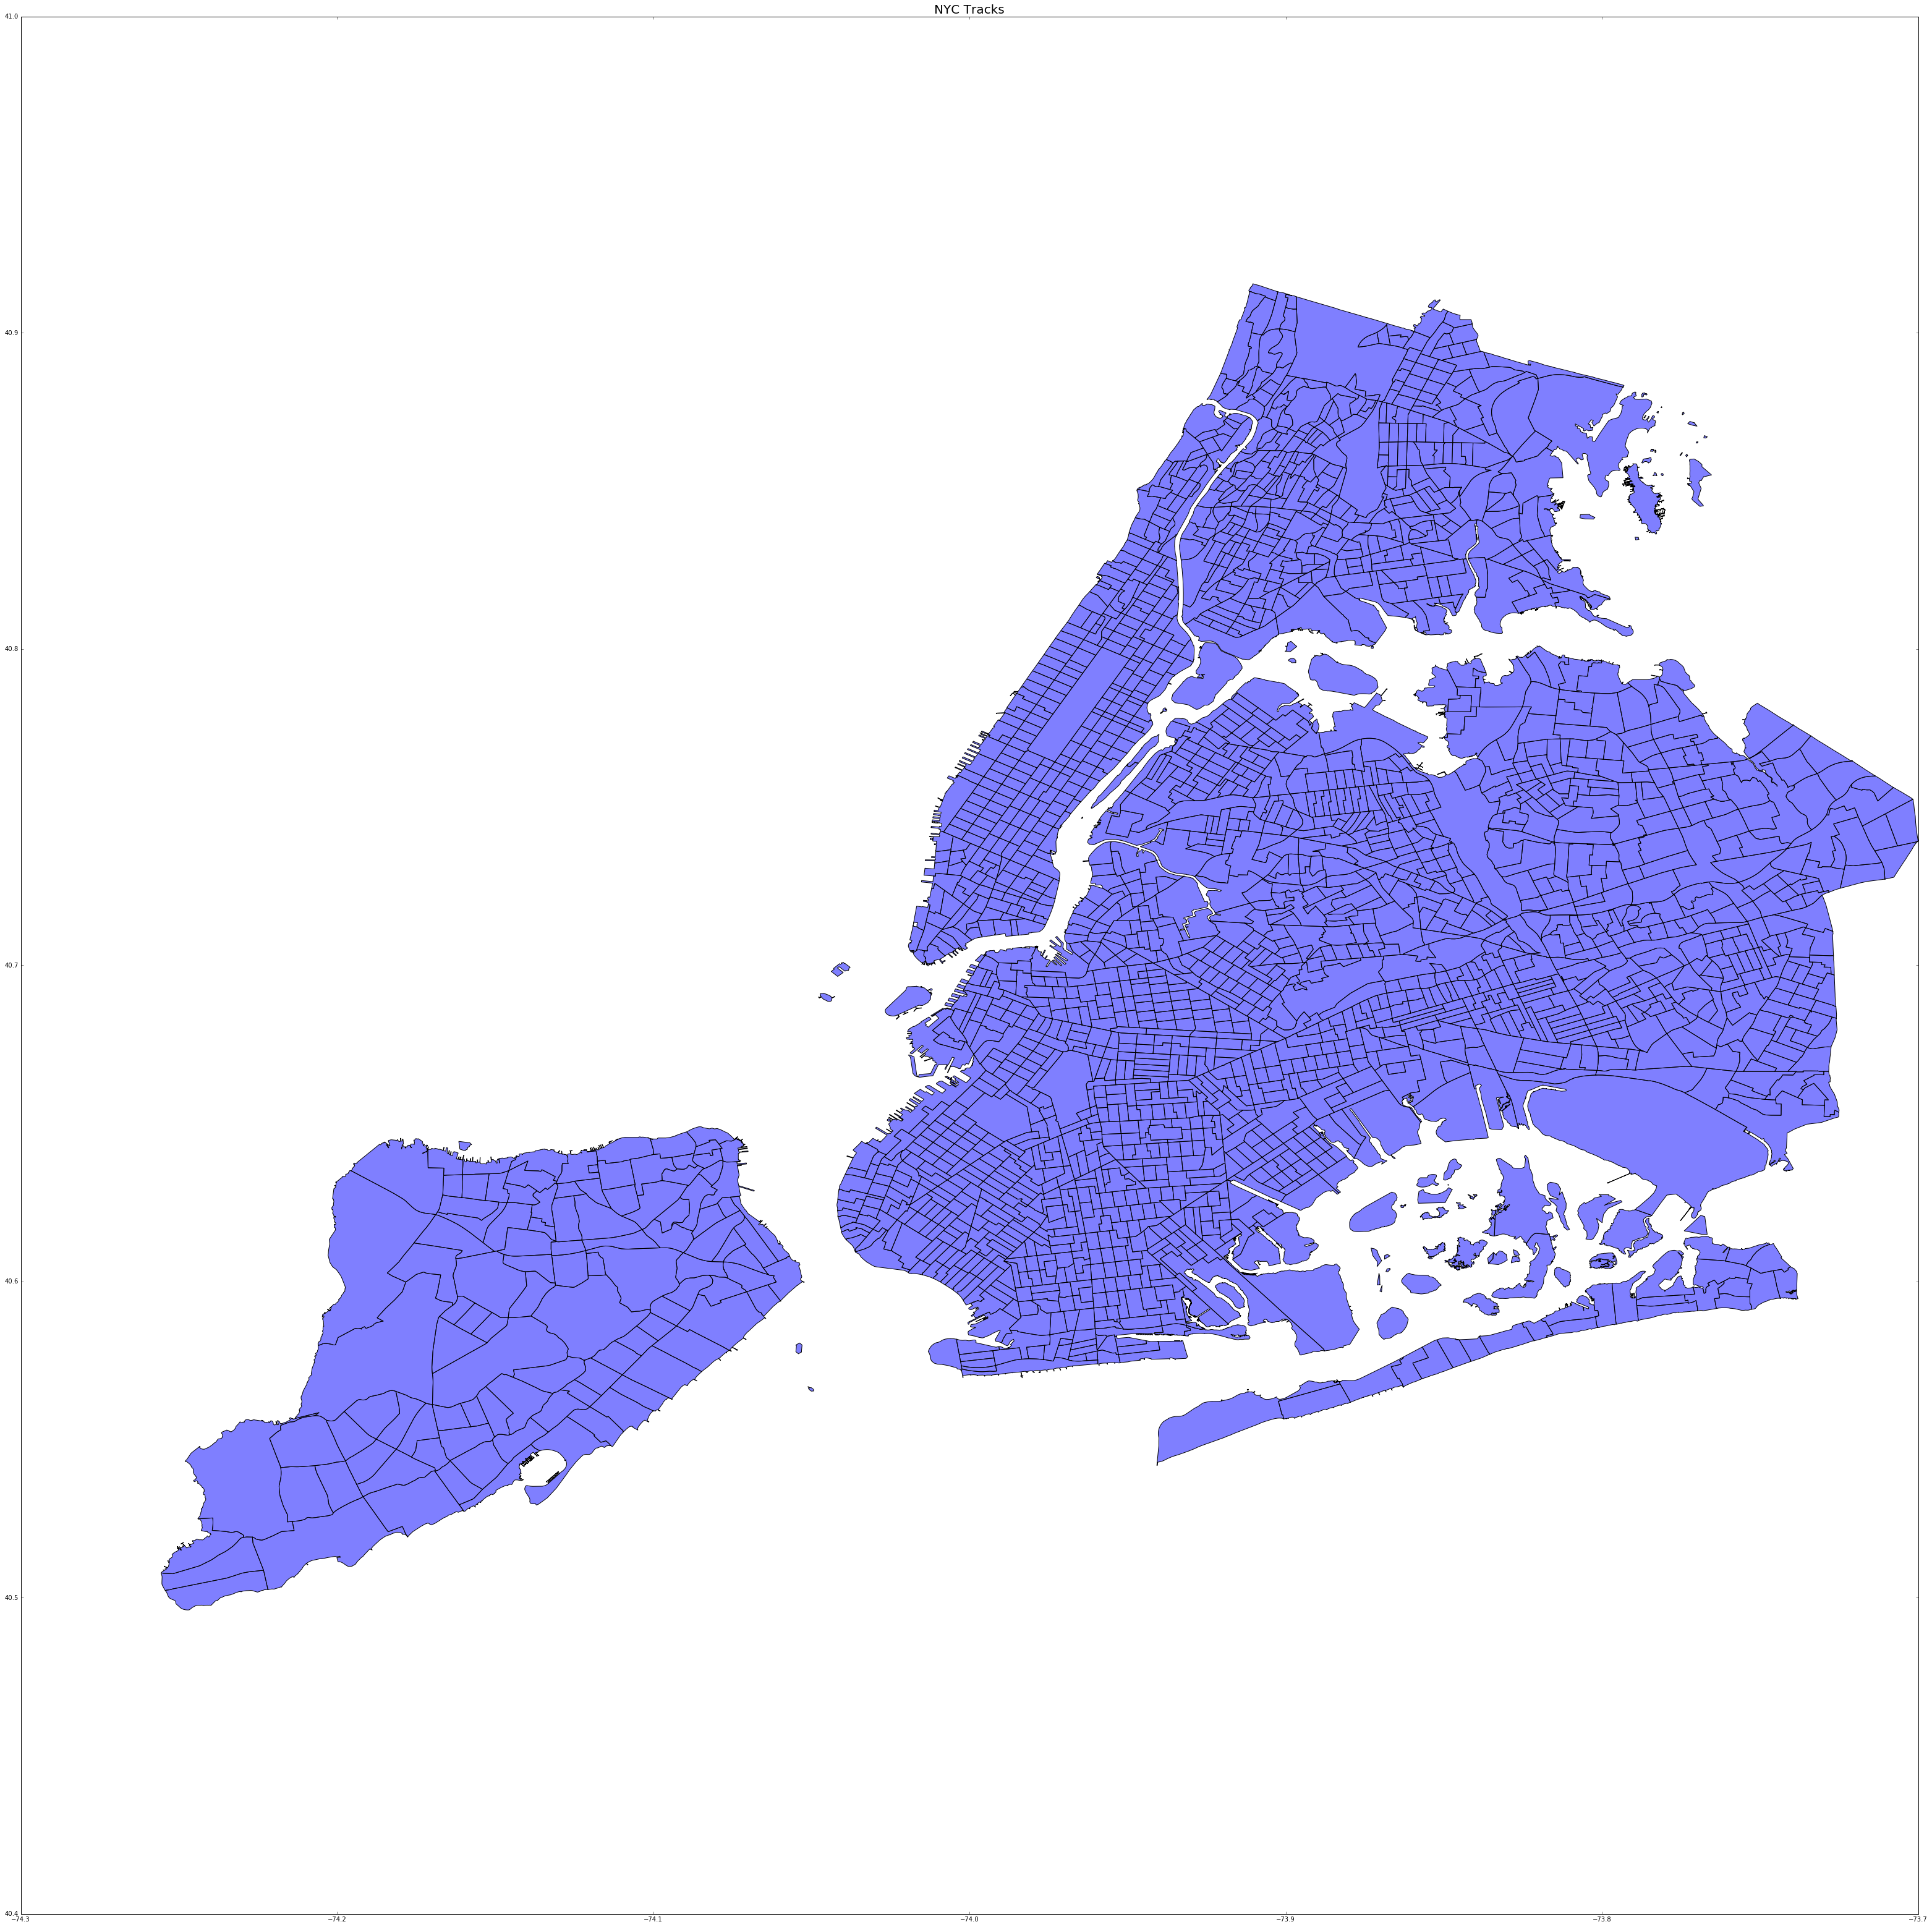

In [6]:
f, ax = pl.subplots(figsize=(55,55))

tracks.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Tracks", size=20)

In [8]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/neighbourhoods.geojson'
filebuffer = urllib.urlretrieve(url, filename='Data/neighbourhoods.geojson')
fname = 'Data/neighbourhoods.geojson'
shapeneighbourhoods = gpd.GeoDataFrame.from_file(fname)
shapeneighbourhoods.head(3)

geometry neighbourhood  \
0  (POLYGON ((-73.76670799999999 40.614911, -73.7...     Bayswater   
1  (POLYGON ((-73.782822 40.843919, -73.782572 40...   City Island   
2  (POLYGON ((-73.848597 40.87167, -73.845823 40....      Allerton   

  neighbourhood_group  
0              Queens  
1               Bronx  
2               Bronx

In [43]:
shapeneighbourhoods.crs = from_epsg(4326)

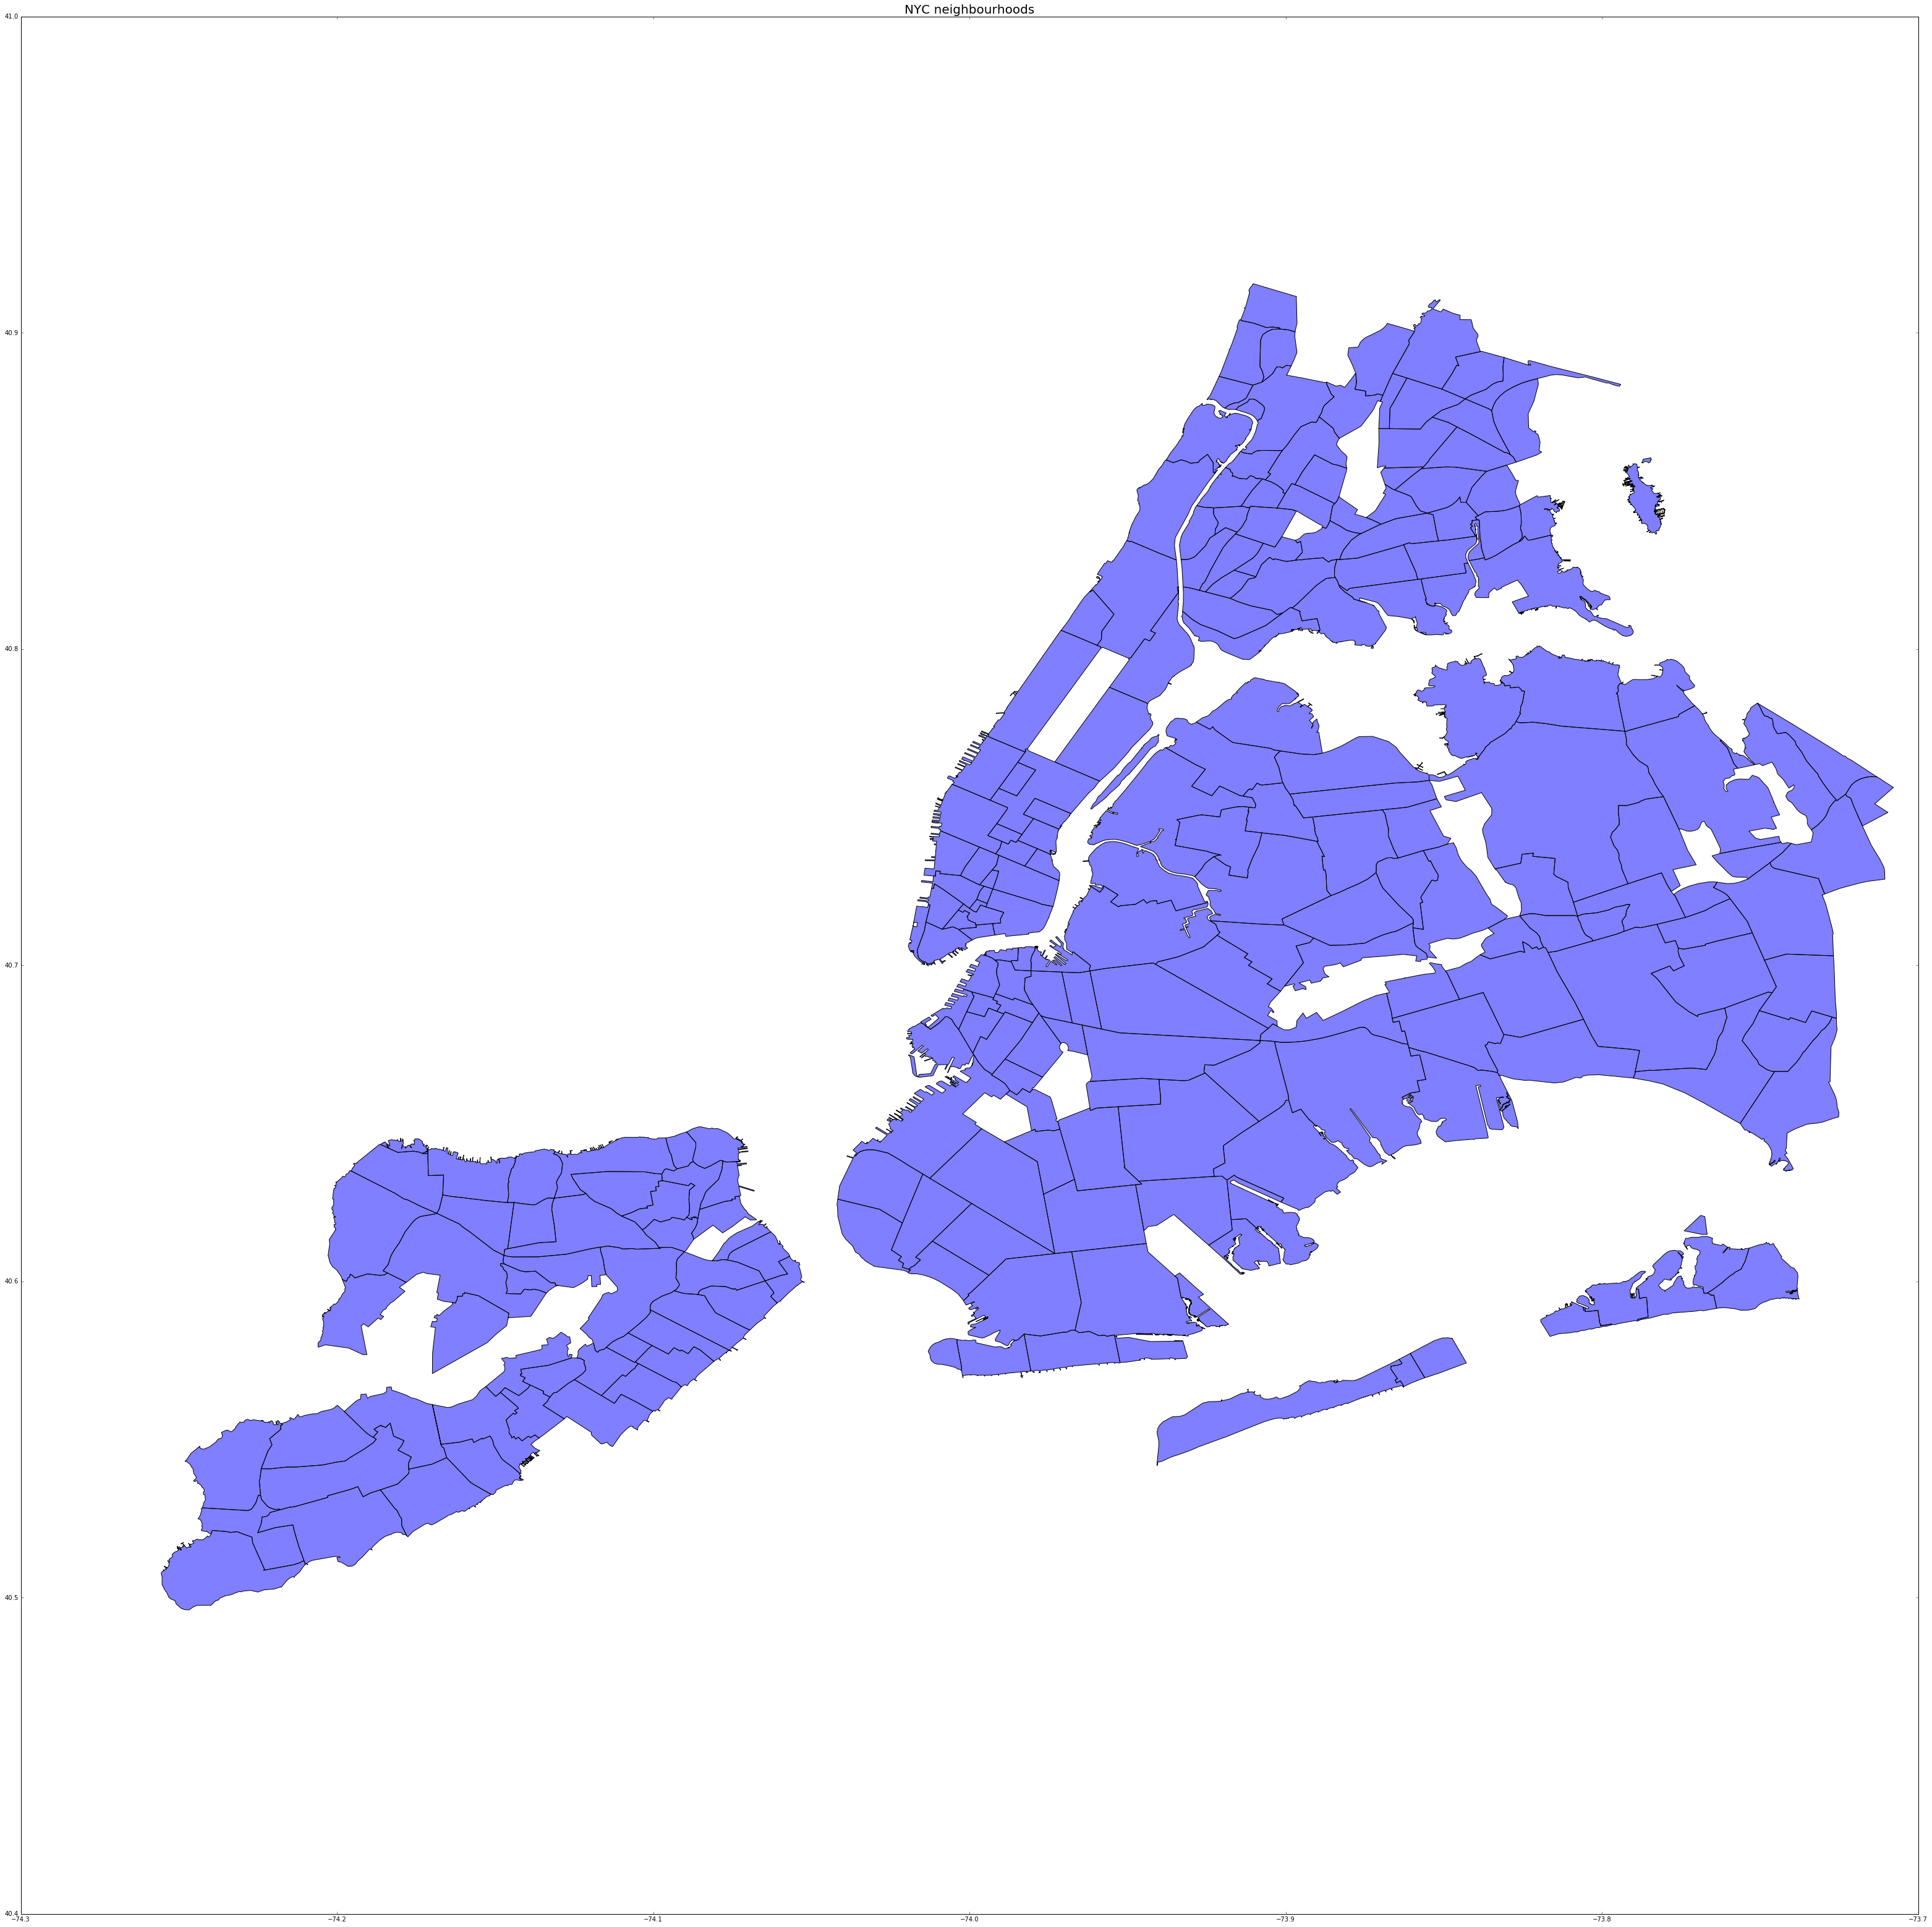

In [44]:
f, ax = pl.subplots(figsize=(55,55))

shapeneighbourhoods.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC neighbourhoods", size=20)

In [9]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/reviews.csv'
filebuffer = urllib.urlretrieve(url, filename='Data/reviews.csv')
fname = 'Data/reviews.csv'
reviews = pd.DataFrame.from_csv(fname)
reviews.head(3)

date
listing_id            
15194207    2016-10-04
15194207    2016-10-24
15194207    2016-11-02

In [10]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/neighbourhoods.csv'
filebuffer = urllib.urlretrieve(url, filename='Data/neighbourhoods.csv')
fname = 'Data/neighbourhoods.csv'
neighbourhoods = pd.DataFrame.from_csv(fname)
neighbourhoods.head(3)

neighbourhood
neighbourhood_group              
Bronx                    Allerton
Bronx                  Baychester
Bronx                     Belmont

In [11]:
url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2017-03-02/visualisations/listings.csv'
filebuffer = urllib.urlretrieve(url, filename='Data/listings.csv')
fname = 'Data/listings.csv'
NYClistings = pd.DataFrame.from_csv(fname)
NYClistings.head(3)

name   host_id  \
id                                                                      
9147025                            Cozy City Island Cottage    403032   
3943387                  Cozy City Island Room/Private Bath  20433973   
15220538  Airy and Peaceful Room and Bath in Victorian Home   1843520   

         host_name neighbourhood_group neighbourhood   latitude  longitude  \
id                                                                           
9147025      Diane               Bronx   City Island  40.844870 -73.789541   
3943387      Julia               Bronx   City Island  40.839396 -73.781437   
15220538     Wendy               Bronx   City Island  40.855898 -73.789496   

                room_type  price  minimum_nights  number_of_reviews  \
id                                                                    
9147025   Entire home/apt    125               2                 36   
3943387      Private room     65               1                 21   
15220538     Private room    110               2                  5   

         last_review  reviews_per_month  calculated_host_listings_count  \
id                                                                        
9147025   2017-03-02               2.49                               1   
3943387   2016-10-22               0.75                               1   
15220538  2016-11-26               1.01                               1   

          availability_365  
id                          
9147025                156  
3943387                362  
15220538               365

In [97]:
fname = 'Data/RENT_NYC.geojson'
householdsNYC = gpd.GeoDataFrame.from_file(fname)
householdsNYC.crs = from_epsg(4326)
householdsNYC.head(3)

COUNTY                                  GEO.display-label  \
0  36005  Block Group 0, Census Tract 1, Bronx County, N...   
1  36005  Block Group 1, Census Tract 1, Bronx County, N...   
2  36005  Block Group 0, Census Tract 2, Bronx County, N...   

                  GEO.id       GEO.id2 HD01_VD01 HD01_VD02 HD01_VD03  \
0  1500000US360050001000  360050001000         0         0         0   
1  1500000US360050001001  360050001001         0         0         0   
2  1500000US360050002000  360050002000         0         0         0   

  HD01_VD04 HD01_VD05 HD01_VD06 ... HD01_VD57 HD01_VD58 HD01_VD59 HD01_VD60  \
0         0         0         0 ...         0         0         0         0   
1         0         0         0 ...         0         0         0         0   
2         0         0         0 ...         0         0         0         0   

  HD01_VD61 HD01_VD62 HD01_VD63 HD01_VD64  \
0         0         0         0         0   
1         0         0         0         0   
2         0         0         0         0   

                                            geometry id  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....  1  
1  POLYGON ((-73.892866 40.790567, -73.89039 40.7...  2  
2  POLYGON ((-73.86270399999999 40.797276, -73.86...  3  

[3 rows x 70 columns]

#### 36005 Bronx, NY C bronx code 2 
#### 36081 Queens, NY C queens code 4 
#### 36047 Kings, NY C brooklyn code 3 
#### 36061 New York, NY C manhattan code 1 
#### 36085 Richmond, NY C staten i code 5

In [113]:
householdsNYC['HD01_VD01'] = pd.to_numeric(householdsNYC['HD01_VD01'])

In [114]:
householdsNYC['HD01_VD01'].sum()

2122185L

In [104]:
def borocode(COUNTY):
    if COUNTY == '36005':
        return '2'
    if COUNTY =='36081':
        return '4'
    if COUNTY =='36047':
        return '3'
    if COUNTY =='36061':
        return '1'
    if COUNTY =='36085':
        return '5'
    
def boroct(x):
    return x[5:-1]
    

householdsNYC['borocode'] = householdsNYC.COUNTY.map(borocode)
householdsNYC['boro_ct_2010'] = householdsNYC['borocode'] + householdsNYC['GEO.id2'].map(boroct)


In [105]:
householdsNYC.head()

COUNTY                                  GEO.display-label  \
0  36005  Block Group 0, Census Tract 1, Bronx County, N...   
1  36005  Block Group 1, Census Tract 1, Bronx County, N...   
2  36005  Block Group 0, Census Tract 2, Bronx County, N...   
3  36005  Block Group 1, Census Tract 2, Bronx County, N...   
4  36005  Block Group 2, Census Tract 2, Bronx County, N...   

                  GEO.id       GEO.id2 HD01_VD01 HD01_VD02 HD01_VD03  \
0  1500000US360050001000  360050001000         0         0         0   
1  1500000US360050001001  360050001001         0         0         0   
2  1500000US360050002000  360050002000         0         0         0   
3  1500000US360050002001  360050002001       231        54         0   
4  1500000US360050002002  360050002002       309        71         0   

  HD01_VD04 HD01_VD05 HD01_VD06     ...      HD01_VD59 HD01_VD60 HD01_VD61  \
0         0         0         0     ...              0         0         0   
1         0         0         0     ...              0         0         0   
2         0         0         0     ...              0         0         0   
3         0         0         0     ...              0         0         0   
4         0         0         0     ...              0         0         0   

  HD01_VD62 HD01_VD63 HD01_VD64  \
0         0         0         0   
1         0         0         0   
2         0         0         0   
3         0         0         0   
4         0         0         0   

                                            geometry id borocode boro_ct_2010  
0  POLYGON ((-73.892504 40.801206, -73.872264 40....  1        2      2000100  
1  POLYGON ((-73.892866 40.790567, -73.89039 40.7...  2        2      2000100  
2  POLYGON ((-73.86270399999999 40.797276, -73.86...  3        2      2000200  
3  POLYGON ((-73.85772 40.813362, -73.85913699999...  4        2      2000200  
4  POLYGON ((-73.85913699999999 40.813171, -73.85...  5        2      2000200  

[5 rows x 72 columns]

In [127]:
print householdsNYC.groupby('boro_ct_2010').sum().shape
count = householdsNYC.groupby('boro_ct_2010').sum()
count.reset_index(inplace = True)
count.head(3)

(2166, 1)


boro_ct_2010  HD01_VD01
0      1000100          0
1      1000201        972
2      1000202       2649

In [128]:
tracks = pd.merge(tracks, count, on='boro_ct_2010')

In [129]:
tracks.head(3)

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         1      1009800      Manhattan          I  009800      98   
2         1      1010000      Manhattan          I  010000     100   

                                            geometry ntacode  \
0  (POLYGON ((-74.07920577013245 40.6434307837456...    SI22   
1  (POLYGON ((-73.96432543478758 40.7563815309909...    MN19   
2  (POLYGON ((-73.96802436915851 40.7595781400528...    MN19   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1                    Turtle Bay-East Midtown  3808  1906016.35002   
2                    Turtle Bay-East Midtown  3808  1860938.37721   

      shape_leng  HD01_VD01  
0  7729.01679376        435  
1  5534.19981063       2628  
2  5692.16873705        886

In [151]:
households = tracks[tracks.HD01_VD01 > 0].HD01_VD01
households = ps.Quantiles(households, k=6)
households

                  Quantiles                  
 
 Lower              Upper               Count
           x[i] <=  292.000               356
 292.000 < x[i] <=  503.000               350
 503.000 < x[i] <=  772.000               352
 772.000 < x[i] <= 1134.000               351
1134.000 < x[i] <= 1691.000               353
1691.000 < x[i] <= 7945.000               352

In [152]:
tracks[tracks.HD01_VD01 > 0].HD01_VD01.min()

4

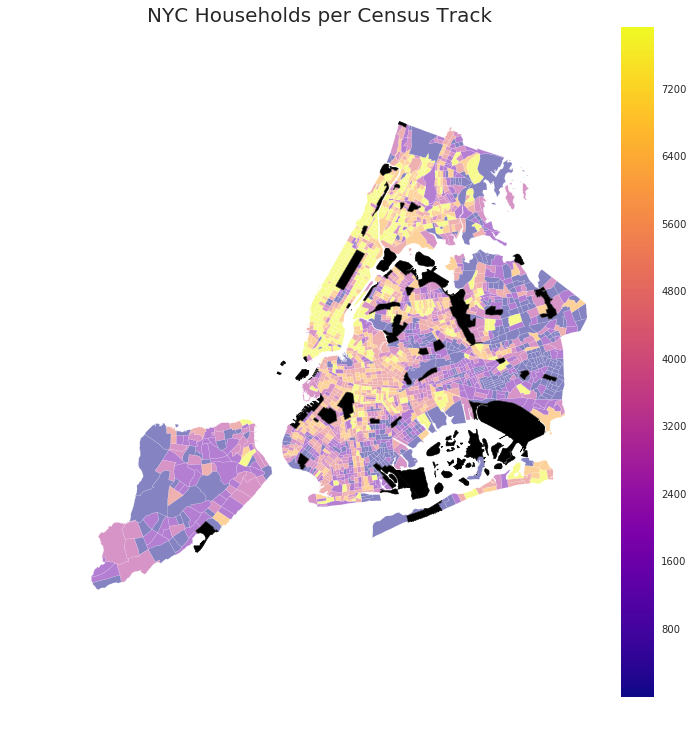

In [158]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap    
mycolor = ListedColormap('k')

f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks[tracks['HD01_VD01']==0].plot(c = 'k', linewidth = .5, ax = ax, cmap=mycolor, alpha=1)
tracks[tracks['HD01_VD01']>0].assign(cl = households.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)

#tracks.assign(cl = households.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
#                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)

pl.axis('off')
pl.title("NYC Households per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks[tracks.HD01_VD01 > 0].HD01_VD01.min(),vmax=tracks.HD01_VD01.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks[tracks['HD01_VD01']>0].assign(cl = households.yb))


pl.colorbar(scalarmappaple, ax=ax)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [183]:
from shapely.geometry import Polygon
from shapely.geometry import Point

In [211]:
def getdata(row):
    return row['id'], row['neighbourhood_group'],  float(row['longitude']), float(row['latitude'])

with open('Data/listings.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output = map(getdata, reader)       
output[:10]

[('9147025', 'Bronx', -73.78954050381778, 40.8448695719099),
 ('3943387', 'Bronx', -73.78143724844766, 40.839396193871046),
 ('15220538', 'Bronx', -73.78949621071705, 40.8558982857858),
 ('6627449', 'Bronx', -73.78660938743727, 40.84977456920603),
 ('7949480', 'Bronx', -73.78867963460137, 40.85205377887418),
 ('16042478', 'Bronx', -73.78860659381962, 40.85349118988138),
 ('5557381', 'Bronx', -73.78932759494228, 40.850023814160465),
 ('1886820', 'Bronx', -73.78305228672215, 40.84114416028828),
 ('2831277', 'Bronx', -73.7911010857536, 40.85527435521511),
 ('11675715', 'Bronx', -73.78413886754988, 40.851391475520586)]

In [256]:
import time

def searchtrack(row):
    listid,boro,lon,lat = row
    
    if boro=='Bronx':
        validtracks = tracks[tracks['boro_name']=='Bronx']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']

    if boro=='Queens':
        validtracks = tracks[tracks['boro_name']=='Queens']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']

    if boro=='Brooklyn':
        validtracks = tracks[tracks['boro_name']=='Brooklyn']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']

    if boro=='Staten Island':
        validtracks = tracks[tracks['boro_name']=='Staten Island']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']
            
    if boro=='Manhattan':
        validtracks = tracks[tracks['boro_name']=='Manhattan']
        for idx in validtracks.index:
            if Point(lon, lat).within(validtracks.ix[idx]['geometry']):
                return validtracks.ix[idx]['boro_ct_2010']
            
start_time = time.time()            
out = map(searchtrack,output)
print("--- %s seconds ---" % (time.time() - start_time))
out[:10]

[u'2051600',
 u'2051600',
 u'2051600',
 u'2051600',
 u'2051600',
 u'2051600',
 u'2051600',
 u'2051600',
 u'2051600',
 u'2051600']

In [261]:
print len(output)
print len(out)
print len(NYClistings)
NYClistings['boro_ct_2010']=out

40586
40586
40586


In [274]:
listingcounts = NYClistings.groupby('boro_ct_2010').count()[['name']].reset_index()
listingcounts.columns = [['boro_ct_2010','Number_of_listings']]
tracks = pd.merge(tracks, listingcounts, on='boro_ct_2010')

In [277]:
Number_of_listings = tracks[tracks.Number_of_listings > 0].Number_of_listings
Number_of_listings = ps.Quantiles(Number_of_listings, k=6)
Number_of_listings

                 Quantiles                 
 
 Lower            Upper               Count
          x[i] <=   1.000               327
  1.000 < x[i] <=   3.000               376
  3.000 < x[i] <=   5.000               171
  5.000 < x[i] <=  15.000               280
 15.000 < x[i] <=  49.000               287
 49.000 < x[i] <= 321.000               283

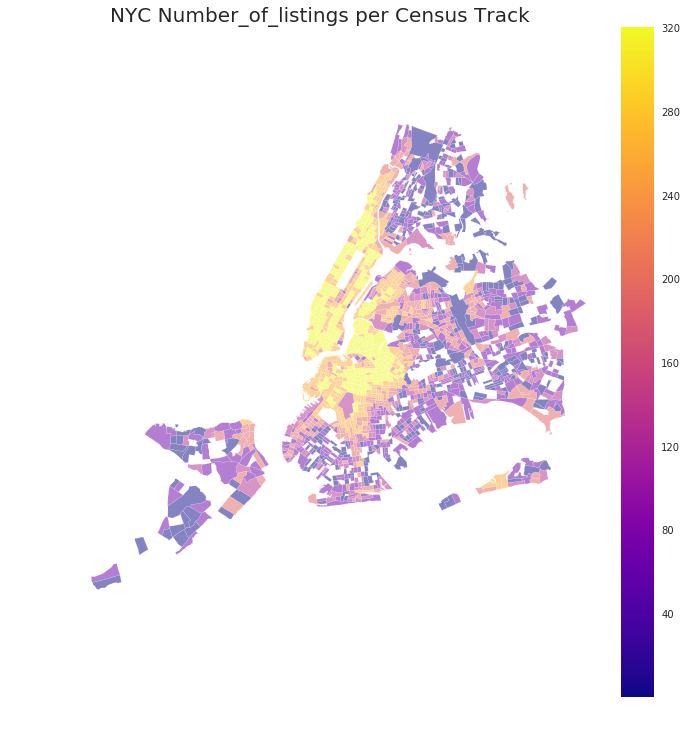

In [281]:
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks[tracks['Number_of_listings']==0].plot(c = 'k', linewidth = .5, ax = ax, cmap=mycolor, alpha=1)
tracks[tracks['Number_of_listings']>0].assign(cl = Number_of_listings.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)



pl.axis('off')
pl.title("NYC Number_of_listings per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks[tracks.Number_of_listings > 0].Number_of_listings.min(),vmax=tracks.Number_of_listings.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks[tracks['Number_of_listings']>0].assign(cl = Number_of_listings.yb))


pl.colorbar(scalarmappaple, ax=ax)

In [283]:
len(tracks[tracks.Number_of_listings > 0])

1724

In [284]:
len(tracks)

1724

In [285]:
tracks.Number_of_listings.min()

1

In [286]:
Number_of_listings = tracks.Number_of_listings
Number_of_listings = ps.Quantiles(Number_of_listings, k=6)
Number_of_listings

                 Quantiles                 
 
 Lower            Upper               Count
          x[i] <=   1.000               327
  1.000 < x[i] <=   3.000               376
  3.000 < x[i] <=   5.000               171
  5.000 < x[i] <=  15.000               280
 15.000 < x[i] <=  49.000               287
 49.000 < x[i] <= 321.000               283

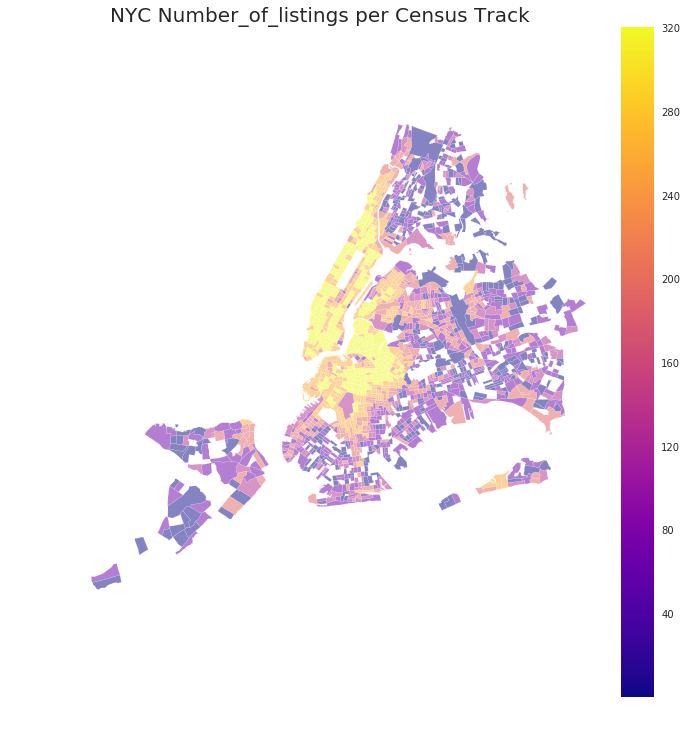

In [287]:
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')
#pl.ylim(40.6, 40.8)
#pl.xlim(-74.05, -73.85)

tracks.assign(cl = Number_of_listings.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)



pl.axis('off')
pl.title("NYC Number_of_listings per Census Track", size=20)

normalize = mcolors.Normalize(vmin=tracks.Number_of_listings.min(),vmax=tracks.Number_of_listings.max())
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)

#scalarmappaple.set_array(tracks.assign(cl = households.yb))


scalarmappaple.set_array(tracks.assign(cl = Number_of_listings.yb))


pl.colorbar(scalarmappaple, ax=ax)

In [289]:
with open('Data/tracks_listing_households.geojson', 'w') as f:
    f.write(tracks.to_json())


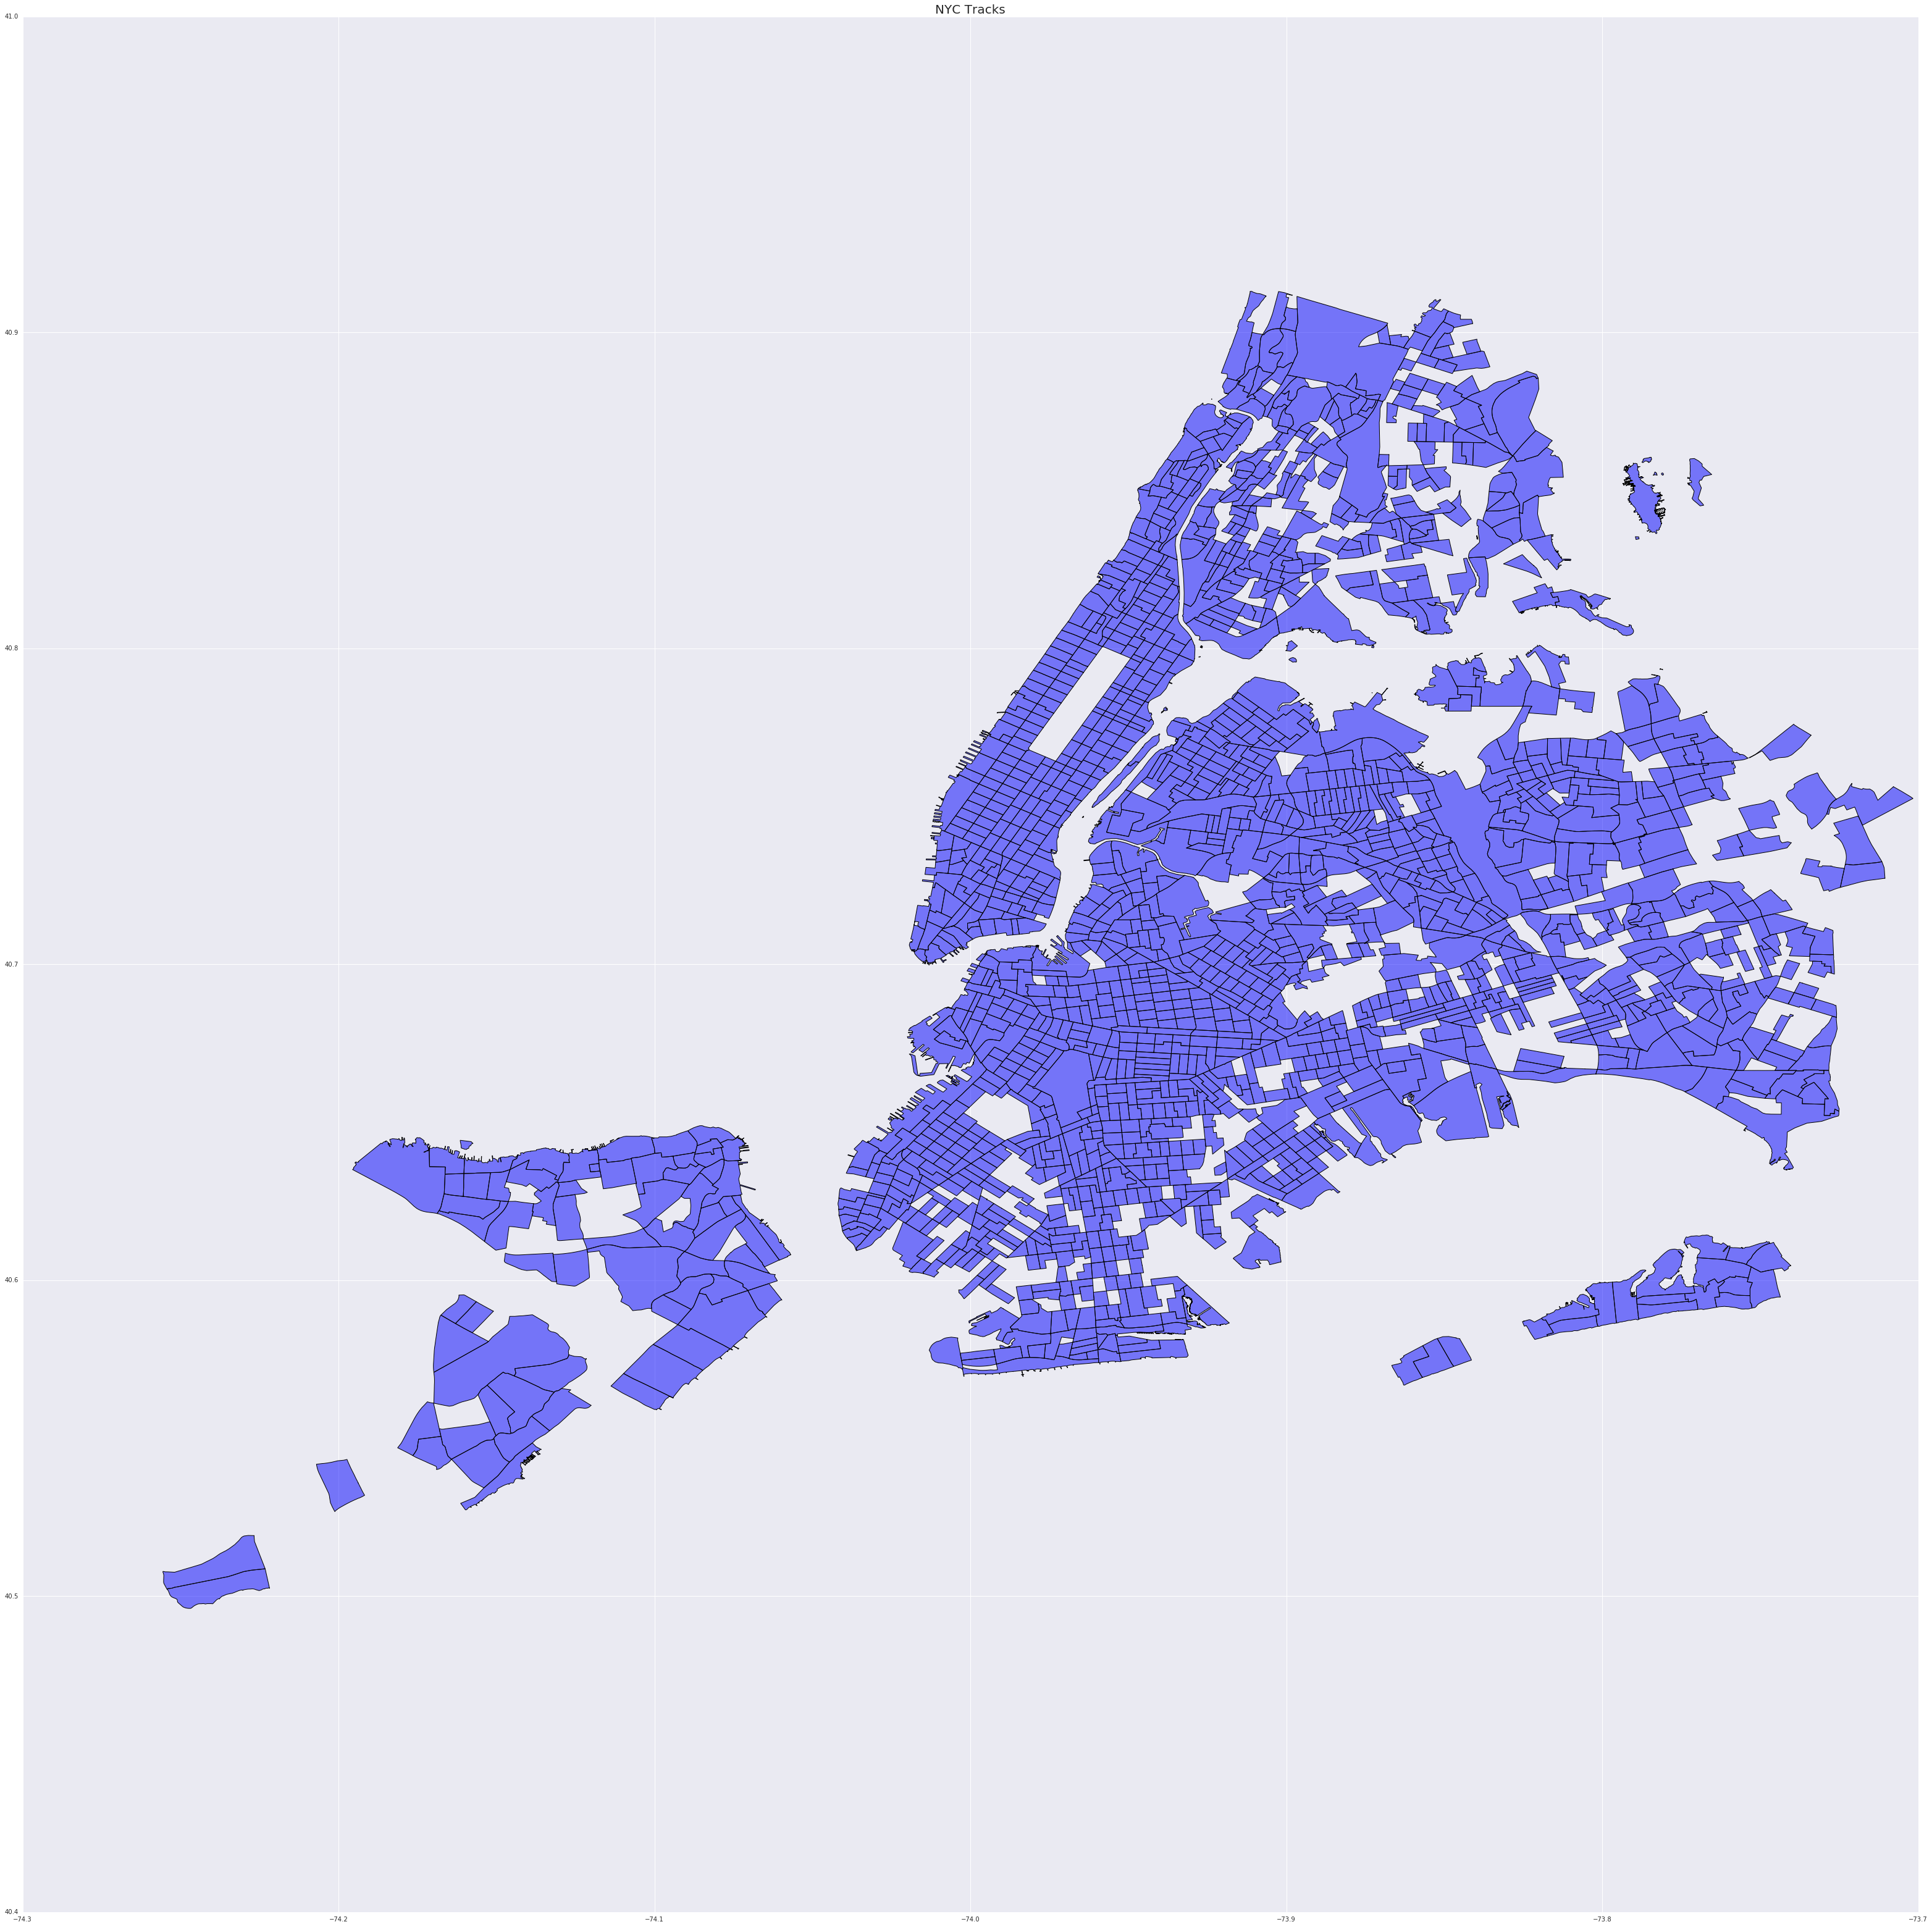

In [288]:
f, ax = pl.subplots(figsize=(55,55))

tracks.plot(linewidth =1, ax = ax,  color='b', label = 'tracks')
#pl.axis('off')
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("NYC Tracks", size=20)